In [1]:
# Import necessary libraries
import os
import numpy as np
import cv2
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [3]:
# Define paths
dataset_path = '/1000_videos'#change the data set path
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')
validation_path = os.path.join(dataset_path, 'validation')

In [4]:
# Define image size and channels
Image_Size = 180  # Update this as necessary
Channels = 3
Epochs = 10 # Update this as necessary

In [5]:
def load_images(image_path, label):
    images = []
    labels = []
    for img in os.listdir(image_path):
        img_path = os.path.join(image_path, img)
        img_data = cv2.imread(img_path)
        img_data = cv2.resize(img_data, (Image_Size, Image_Size))
        images.append(img_data)
        labels.append(label)
    return np.array(images), np.array(labels)

In [6]:
# Load training data
train_real_images, train_real_labels = load_images('./1000_videos/train/real', 0) #change the path
train_fake_images, train_fake_labels = load_images('./1000_videos/train/fake', 1) #change the path

# Load validation data 
validation_real_images, validation_real_labels = load_images('./1000_videos/validation/real', 0) #change the path
validation_fake_images, validation_fake_labels = load_images('./1000_videos/validation/fake', 1) #change the path

# Load test data  # Load the test data here
test_real_images, test_real_labels = load_images('./1000_videos/test/real', 0)  #change the path
test_fake_images, test_fake_labels = load_images('./1000_videos/test/fake', 1) #change the path

# Combine real and fake datasets
x_train = np.concatenate((train_real_images, train_fake_images), axis=0)
y_train = np.concatenate((train_real_labels, train_fake_labels), axis=0)

x_validation = np.concatenate((validation_real_images, validation_fake_images), axis=0)
y_validation = np.concatenate((validation_real_labels, validation_fake_labels), axis=0)

x_test = np.concatenate((test_real_images, test_fake_images), axis=0) 
y_test = np.concatenate((test_real_labels, test_fake_labels), axis=0)

In [7]:
x_train = x_train / 255.0
x_validation = x_validation / 255.0
x_test = x_test / 255.0

print(f'Training data shape: {x_train.shape}, Labels shape: {y_train.shape}')
print(f'Validation data shape: {x_validation.shape}, Labels shape: {y_validation.shape}')
print(f'Test data shape: {x_test.shape}, Labels shape: {y_test.shape}')

Training data shape: (11633, 180, 180, 3), Labels shape: (11633,)
Validation data shape: (2400, 180, 180, 3), Labels shape: (2400,)
Test data shape: (2400, 180, 180, 3), Labels shape: (2400,)


In [8]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Image_Size, Image_Size, Channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

e:\Rishit\projects\ML\deepfake\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107584)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     6,885,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,941,825 (26.48 MB)

 Trainable params: 6,941,825 (26.48 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=Epochs, validation_data=(x_validation, y_validation))


Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 64s 169ms/step - accuracy: 0.5236 - loss: 0.7336 - val_accuracy: 0.5163 - val_loss: 0.6933
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 58s 160ms/step - accuracy: 0.6263 - loss: 0.6391 - val_accuracy: 0.6496 - val_loss: 0.6771
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 59s 160ms/step - accuracy: 0.7568 - loss: 0.4852 - val_accuracy: 0.6492 - val_loss: 0.9261
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 56s 153ms/step - accuracy: 0.8388 - loss: 0.3575 - val_accuracy: 0.7296 - val_loss: 0.6239
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 59s 162ms/step - accuracy: 0.9056 - loss: 0.2268 - val_accuracy: 0.7462 - val_loss: 0.7035
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 55s 152ms/step - accuracy: 0.9457 - loss: 0.1444 - val_accuracy: 0.7421 - val_loss: 0.8312
Epoch 7/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 56s 155ms/step - accuracy: 0.9585 - loss: 0.1076 - val_accuracy: 0.7246 - val_loss: 1.0302
Epoch 8/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 57s 157ms/step - accuracy: 0.9744 - loss: 0

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8332 - loss: 0.5898
Test accuracy: 0.747083306312561


In [12]:
# Define the prediction function for a video
def pred_video(model, video_path):
    frames = []
    img_data = cv2.imread(video_path)
    img_data = cv2.resize(img_data, (Image_Size, Image_Size))
    img_data = img_data / 255.0
    frames.append(img_data)
    frames = np.array(frames)
    predictions = model.predict(frames)
    final_prediction = np.mean(predictions)
    return final_prediction, predictions
# 


In [11]:
def predict_video(video_path, model, frame_interval=5):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    predictions = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        if frame_count % frame_interval == 0:
            # Preprocess the frame
            frame = cv2.resize(frame, (180, 180))
            frame = frame / 255.0
            frame = np.expand_dims(frame, axis=0)

            # Predict
            pred = model.predict(frame)[0]
            label = 1 if pred >= 0.5 else 0  # Assuming sigmoid output
            predictions.append(label)

    cap.release()

    if not predictions:
        return "No frames processed"

    # Majority vote
    fake_frames = predictions.count(0)
    real_frames = predictions.count(1)
    verdict = "Fake" if fake_frames > real_frames else "Real"

    return {
        "verdict": verdict,
        "fake_frames": fake_frames,
        "real_frames": real_frames,
        "total_checked": len(predictions)
    }


In [12]:
# Define the prediction function for individual images
def pred(model, image):
    image = tf.image.resize(image, [Image_Size, Image_Size])  # Resize to match the input shape
    image = np.expand_dims(image, axis=0)  # Expand dims to match input shape
    prediction = model.predict(image)
    predicted_class = 'fake' if prediction[0] > 0.5 else 'real'
    confidence = prediction[0][0] * 100 if predicted_class == 'fake' else (1 - prediction[0][0]) * 100
    return predicted_class, confidence
# 

In [17]:
# Save the model
import pickle
with open("deepfake_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [21]:
# Load the saved model using pickle
with open('deepfake_model.pkl', 'rb') as f:  # Update this path
    model_saved = pickle.load(f)

In [22]:
# Assuming you have class names
class_names = ['fake', 'real']

In [23]:
# Function to load and preprocess an image from a given path
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, [Image_Size, Image_Size])
    image = image / 255.0  # Normalize to [0, 1]
    return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


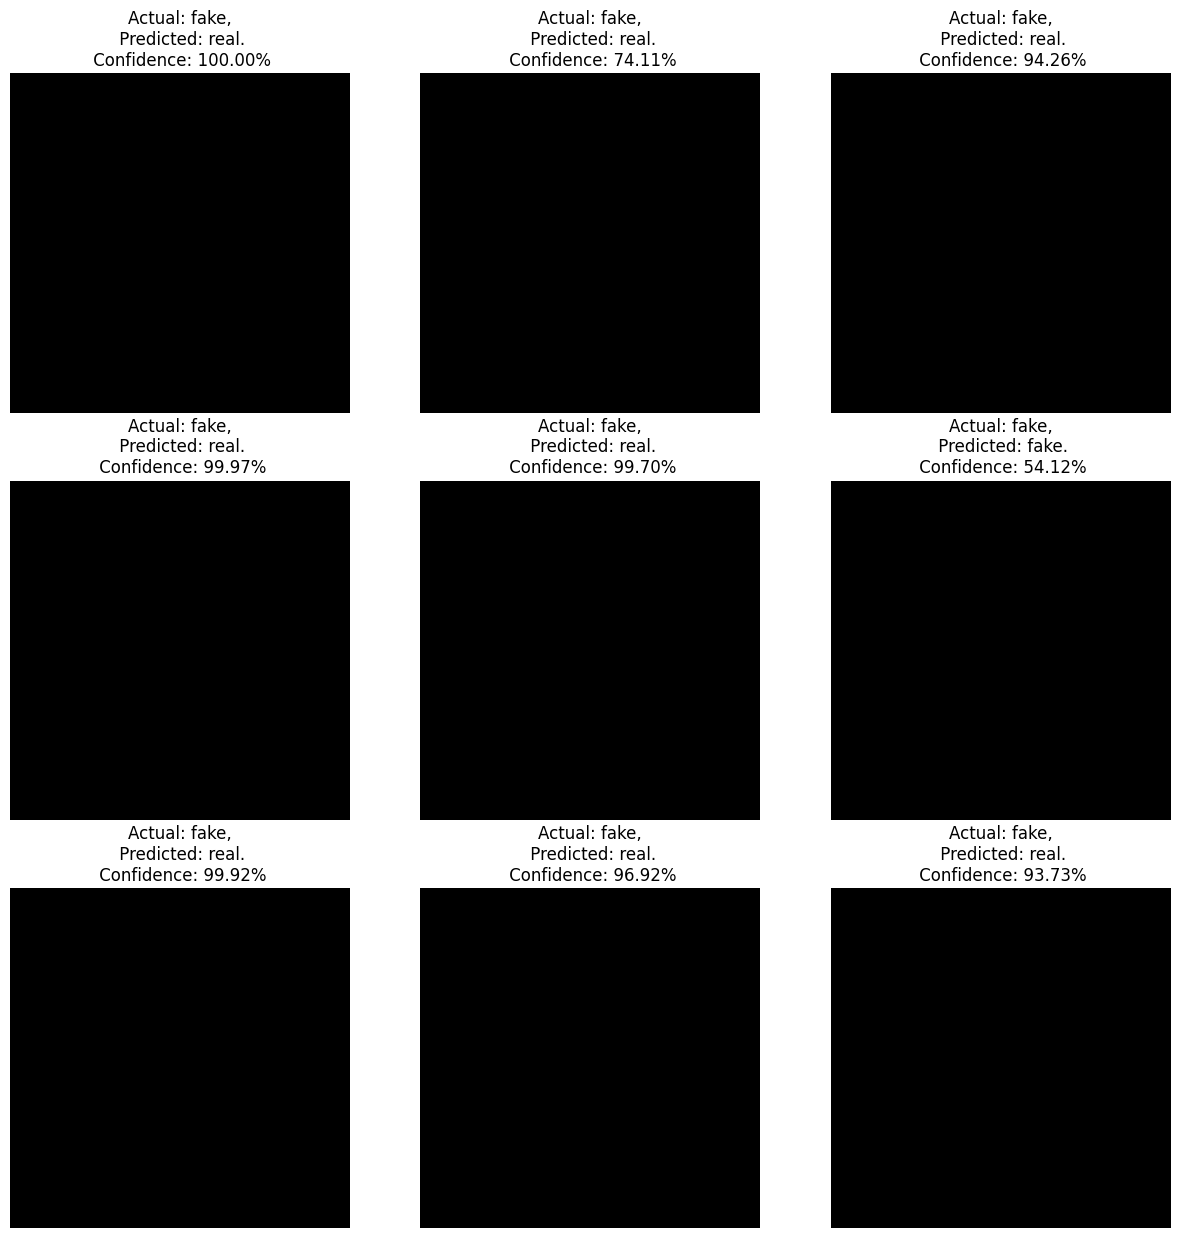

In [24]:
# Predict using the saved model
plt.figure(figsize=(15, 15))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)  # Create a dataset for testing
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")
        img_display = img * 255.0  # Scale back to [0, 255] range
        plt.imshow(img_display.astype("uint8"))
        predicted_class, confidence = pred(model_saved, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence:.2f}%")
        plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


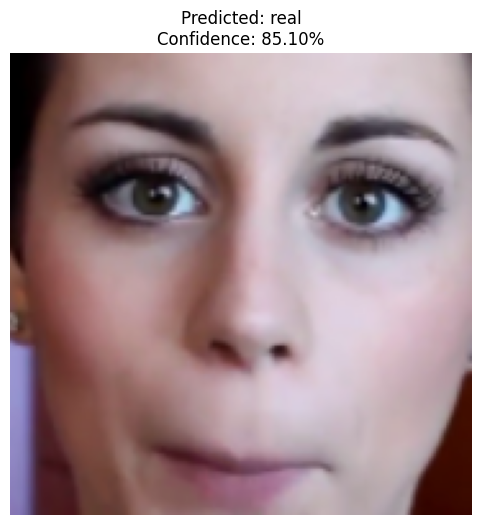

In [25]:
# Add an image of your choice
image_path = './1000_videos/test/real/069_20.png' # Update this path
image = load_and_preprocess_image(image_path)
# Plot and predict for the new image
plt.figure(figsize=(6, 6))
plt.imshow(image.numpy())
predicted_class, confidence = pred(model_saved, image.numpy())
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
plt.axis("off")
plt.show()

In [28]:
video_path = "./deepfake_ex.mp4"
result = predict_video(video_path, model)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━